**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install pydotplus
!apt-get install graphviz -y

Reading dataset

In [106]:
df=pd.read_csv("Iris.csv")

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [108]:
df.head()
df.shape

(150, 6)

Checking NA values

In [109]:
df.isnull().sum()
#There are no NA values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Correlation Matrix

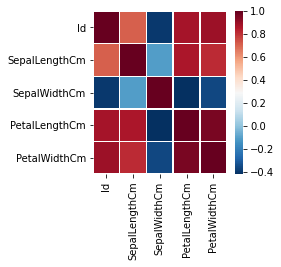

In [110]:
pearsoncorr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            linewidth=0.5,
            ax=ax)
#They are Positively Correlated

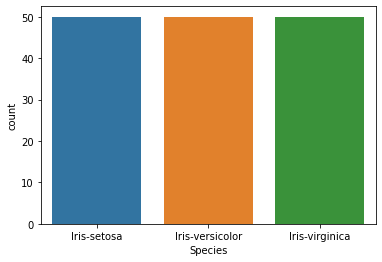

<Figure size 432x288 with 0 Axes>

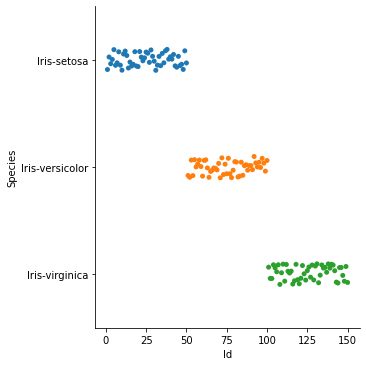

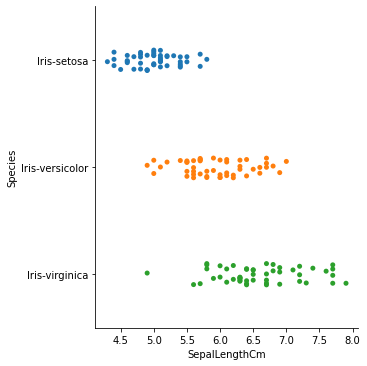

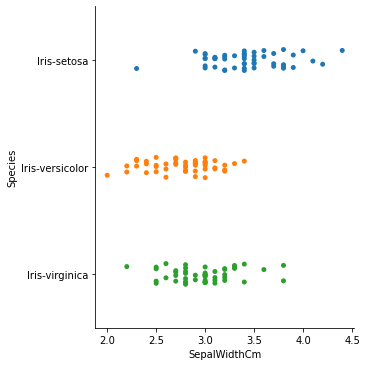

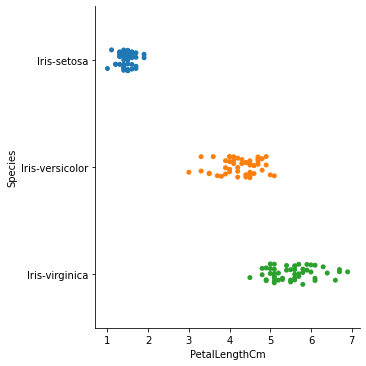

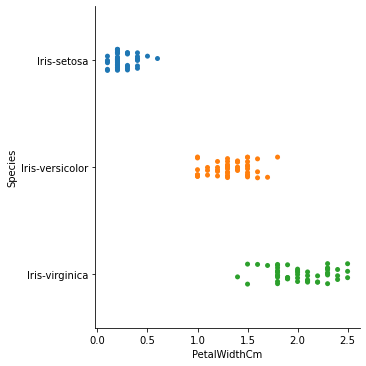

In [111]:
##Visualization
sns.countplot(x ='Species', data = df)
#There is no biasness in the data
num=df.select_dtypes(include=["float64", "int64"])
for i, col in enumerate(num.columns):
    plt.figure(i)
    sns.catplot(x =col, y = "Species", data = df) 

In [112]:
#Treating Outliers
df["SepalWidthCm"][(df['SepalWidthCm']<2.5) & (df['Species'] == 'Iris-setosa')]=df["SepalWidthCm"].mean()
df["SepalLengthCm"][(df['SepalLengthCm']<5) & (df['Species'] == 'Iris-virginica')]=df["SepalLengthCm"].median()
#Removing ID and Species column
df1=df.drop(columns=["Id"], axis=1)
x=df1.drop(columns=["Species"], axis=1).values
y=df1["Species"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Applying Decision trees algorithm**

In [113]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.8)


**For best parameters**

In [114]:
hyperparameter_grid = [    
    {'criterion' : ['entropy','gini'],
    'max_depth' : np.arange(1, 21),
    'min_samples_split' : range(10,500,20)
    }
]

    
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
random_cv = GridSearchCV(estimator=classifier,
            param_grid=hyperparameter_grid,
            cv=5,
            n_jobs = 4,
            verbose = 1, 
            return_train_score = True)
best=random_cv.fit(x_train,y_train)
best.best_params_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 5000 out of 5000 | elapsed:    9.8s finished


{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}

In [115]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, min_samples_split= 10)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

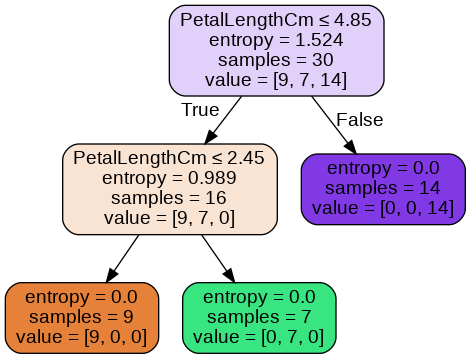

In [116]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
ss=df.iloc[:,1:5].columns
export_graphviz(classifier, out_file=dot_data, feature_names=ss,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Checking the accuracy**

In [117]:
y_pred=classifier.predict(x_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("We are getting accuracy of ",accuracy_score(y_test, y_pred)*100,"%")

[[41  0  0]
 [ 0 39  4]
 [ 0  3 33]]
We are getting accuracy of  94.16666666666667 %
